# Vital Statistics Natality Birth Data, 2018

Exploring patterns in who gets prenatal care

Data source: [US Vital Statistics Natality Birth Data, 2018](https://www.nber.org/research/data/vital-statistics-natality-birth-data) from [NBER Public Use Data Archive](https://www.nber.org/research/data?page=1&perPage=50)

In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.optimize import minimize

warnings.filterwarnings('ignore')
my_cmap = cm.get_cmap('tab10')

## Data Cleaning

In [2]:
# df = pd.read_csv('../data/NBER/natl2018us.csv')

# # Keep only single births and first pregnancy
# df = df[df['dplural'] == 1]
# df = df[df['ilp_r'] == 888]

# # Subset of indicators to consider
# df = df[['mager9', 'mbstate_rec', 'mracehisp', 'meduc', 'precare5', 'wic', 'pay_rec']]

# # Get rid of unknowns
# df = df[df['mbstate_rec'] != 3] # Unknown nativity
# df = df[df['mracehisp'] != 8]   # Unknown race
# df = df[df['meduc'] != 9]       # Unknown education
# df = df[df['precare5'] != 5]    # Unknown prenatal care
# df = df[df['wic'] != 'U']       # Unknown WIC
# df = df[df['pay_rec'] != 9]     # Unknown payment method

# # Change encoding for nativity
# df['mbstate_rec'] = df.apply(lambda row: int(row['mbstate_rec'] == 1), axis=1)

# # Change encoding for WIC
# df['wic'] = df.apply(lambda row: int(row['wic'] == 'Y'), axis=1)

# # Add column for prenatal care
# df['prenatal'] = df.apply(lambda row: int(row['precare5'] != 4), axis=1)

# # Save subset
# df.to_csv('../data/NBER/natl2018us_subset.csv', index=False)
df = pd.read_csv('../../data/NBER/natl2018us_subset.csv')

## Indicators

In [3]:
# Month prenatal care began (`precare5`)
month_dict = {
    1: '1st-3rd month',
    2: '4th-6th month',
    3: '7th-final month',
    4: 'No prenatal care'
}

# Mother's age (`mager9`)
age_dict = {
    1: 'Under 15 years',
    2: '15-19 years',
    3: '20-24 years',
    4: '25-29 years',
    5: '30-34 years',
    6: '35-39 years',
    7: '40-44 years',
    8: '45-49 years',
    9: '50-54 years'
}

# Mother's nativity (`mbstate_rec`)
nat_dict = {
    0: 'Born outside the US',
    1: 'Born in the US'
}

# Mother's race/Hispanic origin (`mracehisp`)
race_dict = {
    1: 'White',
    2: 'Black',
    3: 'AIAN',
    4: 'Asian',
    5: 'NHOPI',
    6: 'More than one race',
    7: 'Hispanic'
}

# Mother's education (`meduc`)
educ_dict = {
    1: '8th grade or less',
    2: '9th through 12th with no diploma',
    3: 'High school graduate or GED completed',
    4: 'Some college credit, but not a degree',
    5: 'Associate degree',
    6: "Bachelor's degree",
    7: "Master's degree",
    8: 'Doctorate'
}

# WIC (`wic`)
wic_dict = {
    0: 'No',
    1: 'Yes'
}

# Payment source for delivery (`pay_rec`)  
pay_dict = {
    1: 'Medicaid',
    2: 'Private Insurance',
    3: 'Self Pay',
    4: 'Other'
}

## Are there differences in who gets prenatal care?

In [4]:
def plot_care(col, col_name, col_dict):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    col_labels = [col_dict[ii] for ii in np.sort(df[col].unique())]
    
    # Plot entire data set
    temp = get_plot_data(col, col_name, col_dict, df)
    sns.barplot(x=col_name, y='care', data=temp, ax=ax[0])
    ax[0].set_xticklabels(col_labels, rotation=90)
    ax[0].set_ylabel(f"Percent With Prenatal Care")
    ax[0].set_title('Full Data Set')
    
    # Plot random subset with equal counts
    temp = pd.DataFrame()
    for seed in np.arange(0, 25):
        df_rand = get_subset(seed)
        temp = pd.concat([temp, get_plot_data(col, col_name, col_dict, df_rand)])
    sns.barplot(x=col_name, y='care', data=temp, ax=ax[1])
    ax[1].set_xticklabels(col_labels, rotation=90)
    ax[1].set_ylabel(f"Percent With Prenatal Care")
    ax[1].set_title('Random Subsets with Equal Counts Care/No Care')
    
def get_plot_data(col, col_name, col_dict, df):
    col_list = []
    care_list = []
    for ii in np.sort(df[col].unique()):
        df_sub = df[df[col] == ii]
        col_list.append(col_dict[ii])
        care_list.append(100*len(df_sub[df_sub['prenatal'] == 1])/len(df_sub))
    temp = pd.DataFrame({
        col_name: col_list,
        'care': care_list
    })
    return temp

def get_subset(seed):
    np.random.seed(seed)
    idx_0 = df[df['prenatal'] == 0].index.tolist()
    idx_1 = df[df['prenatal'] == 1].index.tolist()
    n = np.min([len(idx_0), len(idx_1)])
    idx = np.random.choice(idx_0, n, replace=False).tolist() + \
          np.random.choice(idx_1, n, replace=False).tolist()
    return df.loc[idx]

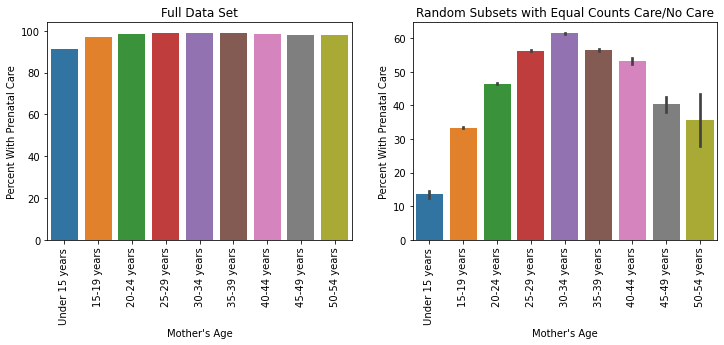

In [5]:
plot_care('mager9', "Mother's Age", age_dict)
plt.savefig('../../results/prenatal_care_1.png', bbox_inches='tight', dpi=300)

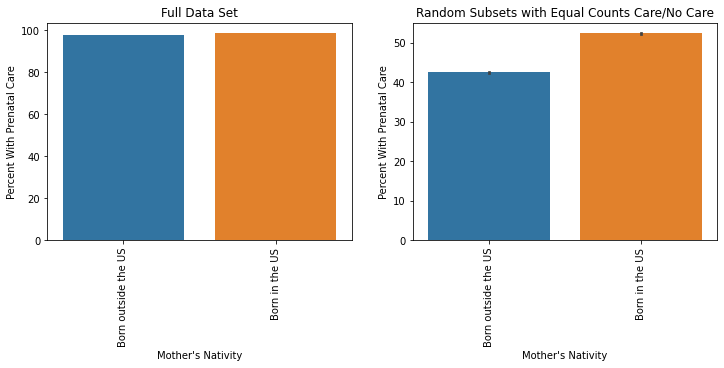

In [6]:
plot_care('mbstate_rec', "Mother's Nativity", nat_dict)
plt.savefig('../../results/prenatal_care_2.png', bbox_inches='tight', dpi=300)

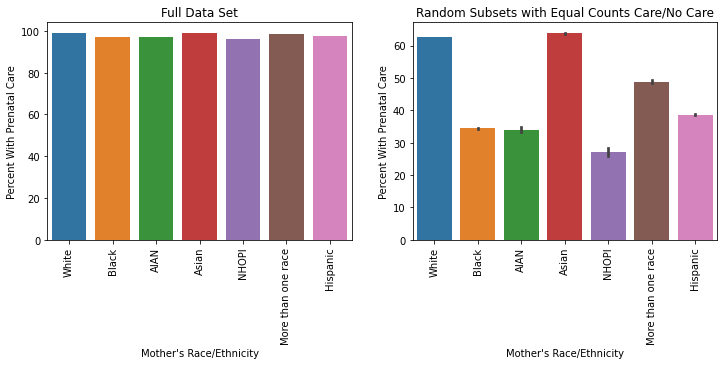

In [7]:
plot_care('mracehisp', "Mother's Race/Ethnicity", race_dict)
plt.savefig('../../results/prenatal_care_3.png', bbox_inches='tight', dpi=300)

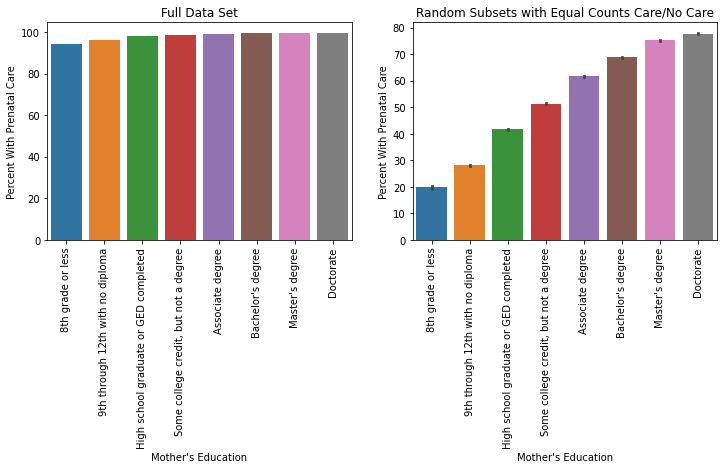

In [8]:
plot_care('meduc', "Mother's Education", educ_dict)
plt.savefig('../../results/prenatal_care_4.png', bbox_inches='tight', dpi=300)

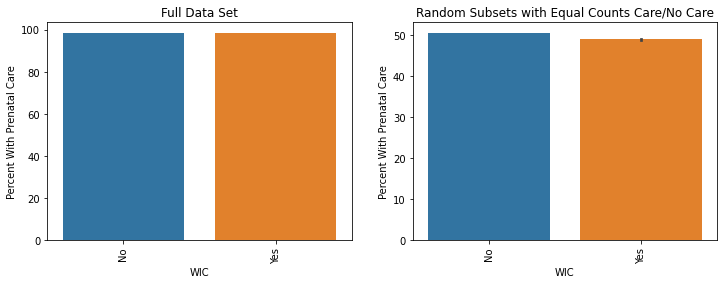

In [9]:
plot_care('wic', 'WIC', wic_dict)
plt.savefig('../../results/prenatal_care_5.png', bbox_inches='tight', dpi=300)

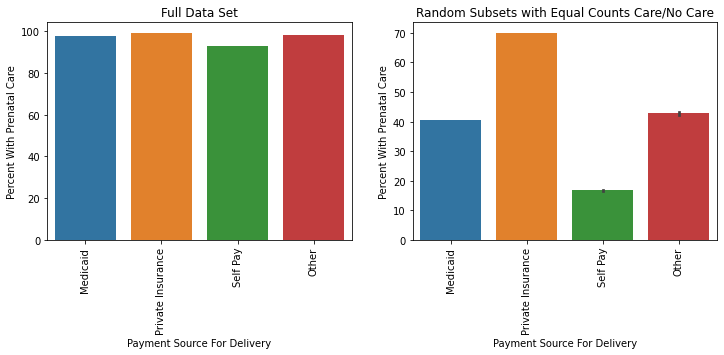

In [10]:
plot_care('pay_rec', 'Payment Source For Delivery', pay_dict)
plt.savefig('../../results/prenatal_care_6.png', bbox_inches='tight', dpi=300)

## Can we predict who gets prenatal care?

Follow up: What are the most important indicators for predicting who gets prenatal care?

In [11]:
group_dict = {
    0: [0],               # mbstate_rec
    1: [1],               # wic
    2: np.arange(2, 11),  # mager9
    3: np.arange(11, 18), # mracehisp
    4: np.arange(18, 26), # meduc
    5: np.arange(26, 30), # pay_rec
    6: [30]               # constant
}

group_name = {
    0: 'mbstate_rec',
    1: 'wic',
    2: 'mager9',
    3: 'mracehisp',
    4: 'meduc',
    5: 'pay_rec',
    6: 'constant'
}

def get_group(ii):
    for group in group_dict:
        if ii in group_dict[group]:
            return group

def add_label(ii):
    for group in group_dict:
        if ii == group_dict[group][0]:
            return True
    return False

In [12]:
# Define loss function
def loss(b, X, y, lam, group=False):
    Xb = X.dot(b)
    nll = (np.sum(np.log(1 + np.exp(Xb))) - y.dot(Xb))/X.shape[0]
    if group:
        return nll + lam*reg(b)
    return nll + lam*np.linalg.norm(b, 1)

# Define regularization function for group sparsity
def reg(b):
    reg_sum = 0
    for group in group_dict:
        b_sub = b[group_dict[group]]
        reg_sum += np.linalg.norm(b_sub, 2)/len(b_sub)
    return reg_sum

def print_message(X, y, res):
    y_pred = X.dot(res.x)
    y_pred = 1*(y_pred >= 0)
    accu = 100*sum(y_pred == y)/len(y)
    sens = 100*len(y_pred[(y_pred == 1) & (y == 1)])/len(y[y == 1])
    spec = 100*len(y_pred[(y_pred == 0) & (y == 0)])/len(y[y == 0])
    message = f"Converge: {res.success}, Prediction accuracy: {accu:.2f}%, "
    message += f"Sensitivity: {sens:.2f}%, Specificity: {spec:.2f}%"
    print(message)

### No regularization

In [13]:
# coef_list = []
# for seed in np.arange(25):
#     df_who = get_subset(seed)

#     # Create dummy variables
#     data = pd.get_dummies(df_who, columns=['mager9', 'mracehisp', 'meduc', 'pay_rec'])
#     data.drop(columns='precare5', inplace=True)

#     # Create feature matrix and outcome vector
#     y = data['prenatal'].values
#     features = [col != 'prenatal' for col in data.columns]
#     X = data.loc[:, features].values
#     X = np.hstack((X, np.ones((X.shape[0], 1))))

#     # Solution with no regularization
#     res = minimize(lambda b: loss(b, X, y, 0, group=False), np.random.randn(31))
#     coef_list.append(res.x)
    
#     # Prediction accuracy
#     print_message(X, y, res)
#np.save('no_reg.npy', coef_list)
coef_list = np.load('no_reg.npy')

In [14]:
indicator_labels = ['Born in the US', 'WIC'] + list(age_dict.values()) + list(race_dict.values()) + \
                   list(educ_dict.values()) + list(pay_dict.values()) + ['Constant']
data = pd.get_dummies(df, columns=['mager9', 'mracehisp', 'meduc', 'pay_rec'])
data.drop(columns='precare5', inplace=True)
features = [col != 'prenatal' for col in data.columns]
indicator_list = list(data.columns[features]) + ['constant']
temp = pd.DataFrame(columns=['indicator', 'coef'])
for ii, indicator in enumerate(indicator_list):
    coefs = [coefs[ii] for coefs in coef_list]
    temp = temp.append(pd.DataFrame({
        'indicator': [indicator]*len(coefs),
        'coef': coefs
    }), ignore_index=True)

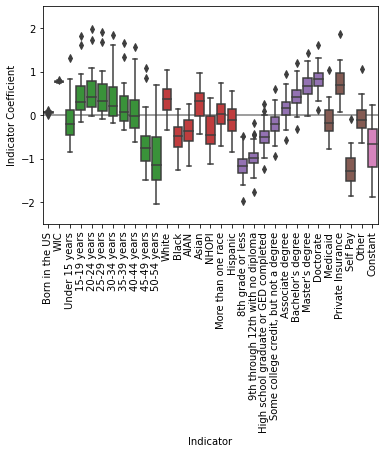

In [15]:
fig, ax = plt.subplots()
my_pal = {indicator: my_cmap(get_group(ii)) for ii, indicator in enumerate(indicator_list)}
sns.boxplot(x='indicator', y='coef', data=temp, ax=ax, palette=my_pal)
ax.axhline(0, c='gray', zorder=0)
ax.set_xlabel('Indicator')
ax.set_xticklabels(labels=indicator_labels, rotation=90)
ax.set_ylabel('Indicator Coefficient')
ax.set_ylim([-2.5, 2.5]) # mager9_9 has lower outliers
plt.savefig('../../results/prenatal_care_7.png', bbox_inches='tight', dpi=300)

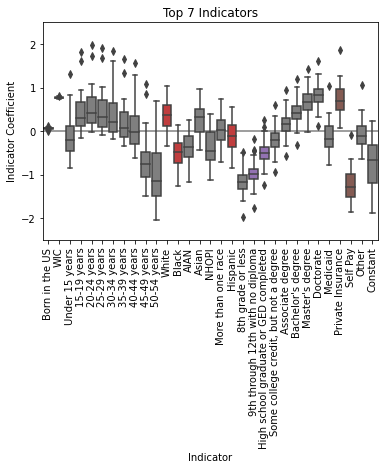

In [16]:
top_indicators=['pay_rec_2', 'pay_rec_3', 'mracehisp_1', 'mracehisp_2', 'mracehisp_7', 'meduc_2', 'meduc_3']
my_pal2 = {indicator: my_cmap(get_group(ii)) if indicator in top_indicators else my_cmap(7)
          for ii, indicator in enumerate(indicator_list) }
fig, ax = plt.subplots()
sns.boxplot(x='indicator', y='coef', data=temp, ax=ax, palette=my_pal2)
ax.axhline(0, c='gray', zorder=0)
ax.set_xlabel('Indicator')
ax.set_xticklabels(labels=indicator_labels, rotation=90)
ax.set_ylabel('Indicator Coefficient')
ax.set_ylim([-2.5, 2.5]) # mager9_9 has lower outliers
ax.set_title('Top 7 Indicators');

### L1 Regularization

In [17]:
# path_list = []
# lam_list = np.logspace(-4, -1, 25)
# for seed in np.arange(25):
#     print(f"\nSeed: {seed}")
#     df_who = get_subset(seed)

#     # Create dummy variables
#     data = pd.get_dummies(df_who, columns=['mager9', 'mracehisp', 'meduc', 'pay_rec'])
#     data.drop(columns='precare5', inplace=True)

#     # Create feature matrix and outcome vector
#     y = data['prenatal'].values
#     features = [col != 'prenatal' for col in data.columns]
#     X = data.loc[:, features].values
#     X = np.hstack((X, np.ones((X.shape[0], 1))))
    
#     coef_list = []
#     for ii, lam in enumerate(lam_list):
#         # Solution with increasing regularization
#         res = minimize(lambda b: loss(b, X, y, lam, group=False), np.random.randn(31))
#         coef_list.append(res.x)
        
#         # Prediction accuracy
#         print_message(X, y, res)
#         if not res.success:
#             print(res.message)
#     path_list.append(coef_list)
#np.save('path_list_individual.npy', path_list)
path_list = np.load('path_list_individual.npy')

In [18]:
seed_list = []
lam_list = []
ind_list = []
coef_list = []
group_list = []
for seed in np.arange(25):
    sub_list = path_list[seed]
    for ii, lam in enumerate(np.logspace(-4, -1, 25)):
        res_list = sub_list[ii]
        for jj, indicator in enumerate(indicator_list):
            seed_list.append(seed)
            lam_list.append(lam)
            ind_list.append(indicator)
            coef_list.append(res_list[jj])
            group_list.append(get_group(jj))
temp = pd.DataFrame({
    'seed': seed_list,
    'lambda': lam_list,
    'indicator': ind_list,
    'coef': coef_list,
    'group': group_list
})

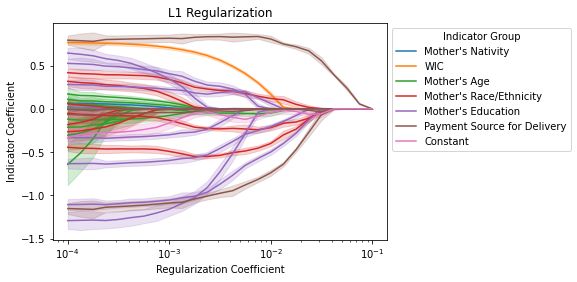

In [19]:
fig, ax = plt.subplots()
sns.lineplot(x='lambda', y = 'coef', hue='indicator', ci='sd', palette=my_pal, data=temp, ax=ax)
ax.set_xscale('log')
ax.set_xlabel('Regularization Coefficient')
ax.set_ylabel('Indicator Coefficient')
handles = ax.get_legend_handles_labels()[0]
handles_sub = [handles[ii] for ii in [0, 1, 2, 11, 18, 26, 30]]
labels = ["Mother's Nativity", 'WIC', "Mother's Age", "Mother's Race/Ethnicity",
          "Mother's Education", 'Payment Source for Delivery', 'Constant']
ax.legend(handles_sub, labels, title='Indicator Group', bbox_to_anchor=(1, 1))
ax.set_title('L1 Regularization');
plt.savefig('../../results/prenatal_care_8.png', bbox_inches='tight', dpi=300)

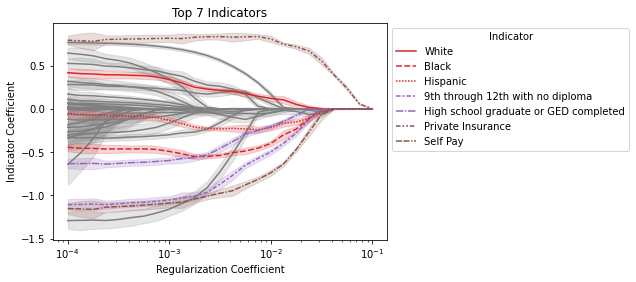

In [20]:
my_pal3 = {indicator: my_cmap(7) for indicator in indicator_list}
fig, ax = plt.subplots()
sns.lineplot(x='lambda', y = 'coef', hue='indicator', ci='sd', palette=my_pal3,
             data=temp[temp['indicator'].isin(top_indicators) == False], ax=ax)
sns.lineplot(x='lambda', y = 'coef', hue='indicator', ci='sd', palette=my_pal, style='indicator',
             data=temp[temp['indicator'].isin(top_indicators)], ax=ax)
ax.set_xscale('log')
ax.set_xlabel('Regularization Coefficient')
ax.set_ylabel('Indicator Coefficient')
handles = ax.get_legend_handles_labels()[0]
handles_sub = handles[-7:]
labels = ['White', 'Black', 'Hispanic', '9th through 12th with no diploma',
          'High school graduate or GED completed', 'Private Insurance', 'Self Pay']
ax.legend(handles_sub, labels, title='Indicator', bbox_to_anchor=(1, 1))
ax.set_title('Top 7 Indicators');

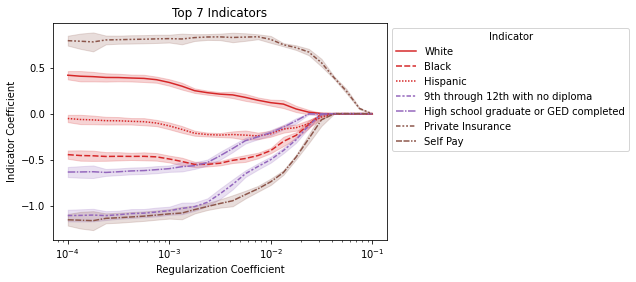

In [21]:
fig, ax = plt.subplots()
sns.lineplot(x='lambda', y = 'coef', hue='indicator', style='indicator', ci='sd', palette=my_pal,
             data=temp[temp['indicator'].isin(top_indicators)], ax=ax)
ax.set_xscale('log')
ax.set_xlabel('Regularization Coefficient')
ax.set_ylabel('Indicator Coefficient')
ax.legend(labels, title='Indicator', bbox_to_anchor=(1, 1))
ax.set_title('Top 7 Indicators');
plt.savefig('../../results/prenatal_care_9.png', bbox_inches='tight', dpi=300)

### Group Sparsity

In [22]:
# path_list = []
# lam_list = np.logspace(-3, 0, 25)
# for seed in np.arange(25):
#     print(f"\nSeed: {seed}")
#     df_who = get_subset(seed)

#     # Create dummy variables
#     data = pd.get_dummies(df_who, columns=['mager9', 'mracehisp', 'meduc', 'pay_rec'])
#     data.drop(columns='precare5', inplace=True)

#     # Create feature matrix and outcome vector
#     y = data['prenatal'].values
#     features = [col != 'prenatal' for col in data.columns]
#     X = data.loc[:, features].values
#     X = np.hstack((X, np.ones((X.shape[0], 1))))
    
#     coef_list = []
#     for ii, lam in enumerate(lam_list):
#         # Solution with increasing regularization
#         res = minimize(lambda b: loss(b, X, y, lam, group=True), np.random.randn(31))
#         coef_list.append(res.x)
        
#         # Prediction accuracy
#         print_message(X, y, res)
#         if not res.success:
#             print(res.message)
#     path_list.append(coef_list)
# np.save('path_list_group.npy', path_list)
path_list = np.load('path_list_group.npy')

In [23]:
seed_list = []
lam_list = []
ind_list = []
coef_list = []
group_list = []
for seed in np.arange(25):
    sub_list = path_list[seed]
    for ii, lam in enumerate(np.logspace(-4, -1, 25)):
        res_list = sub_list[ii]
        for jj, indicator in enumerate(indicator_list):
            seed_list.append(seed)
            lam_list.append(lam)
            ind_list.append(indicator)
            coef_list.append(res_list[jj])
            group_list.append(get_group(jj))
temp = pd.DataFrame({
    'seed': seed_list,
    'lambda': lam_list,
    'indicator': ind_list,
    'coef': coef_list,
    'group': group_list
})

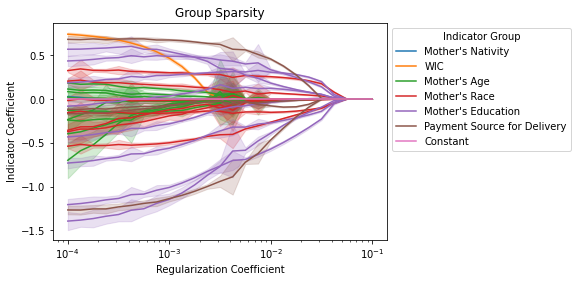

In [24]:
fig, ax = plt.subplots()
sns.lineplot(x='lambda', y = 'coef', hue='indicator', ci='sd', palette=my_pal, data=temp, ax=ax)
ax.set_xscale('log')
ax.set_xlabel('Regularization Coefficient')
ax.set_ylabel('Indicator Coefficient')
ax.set_title('Group Sparsity')
handles = ax.get_legend_handles_labels()[0]
handles_sub = [handles[ii] for ii in [0, 1, 2, 11, 18, 26, 30]]
labels = ["Mother's Nativity", 'WIC', "Mother's Age", "Mother's Race",
          "Mother's Education", 'Payment Source for Delivery', 'Constant']
ax.legend(handles_sub, labels, title='Indicator Group', bbox_to_anchor=(1, 1));

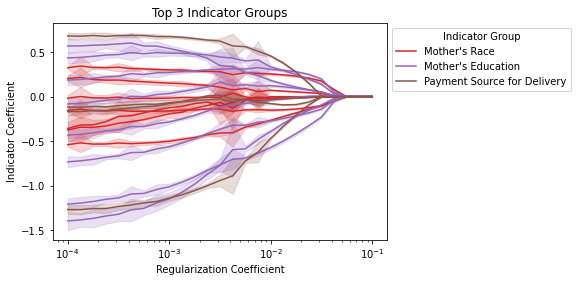

In [25]:
fig, ax = plt.subplots()
sns.lineplot(x='lambda', y = 'coef', hue='indicator', ci='sd', palette=my_pal,
             data=temp[temp['group'].isin([3, 4, 5])], ax=ax)
ax.set_xscale('log')
ax.set_xlabel('Regularization Coefficient')
ax.set_ylabel('Indicator Coefficient')
ax.set_title('Top 3 Indicator Groups')
handles = ax.get_legend_handles_labels()[0]
handles_sub = [handles[ii] for ii in [0, 7, 15]]
labels = ["Mother's Race", "Mother's Education", 'Payment Source for Delivery']
ax.legend(handles_sub, labels, title='Indicator Group', bbox_to_anchor=(1, 1));

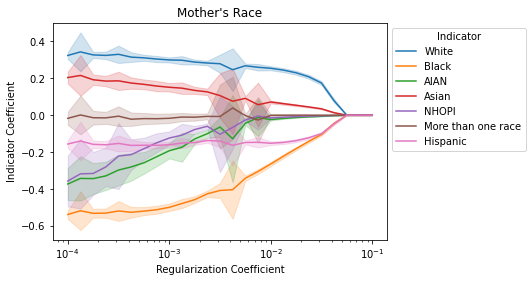

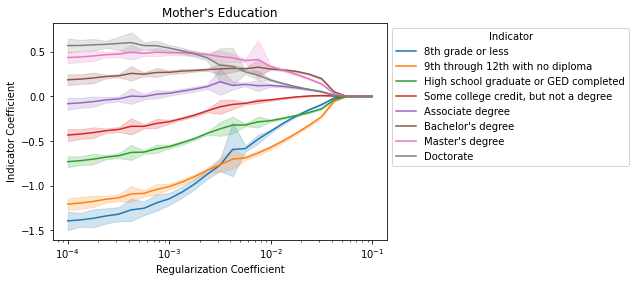

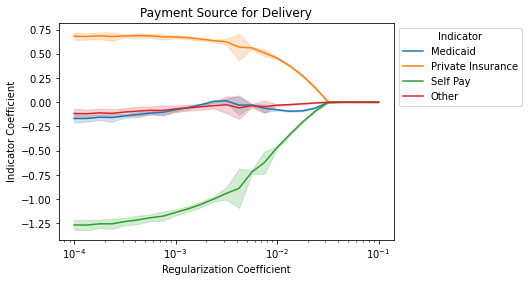

In [26]:
ind_dict = [race_dict, educ_dict, pay_dict]
title_list = ["Mother's Race", "Mother's Education", 'Payment Source for Delivery']
for group in [3, 4, 5]:
    fig, ax = plt.subplots()
    sns.lineplot(x='lambda', y = 'coef', hue='indicator', ci='sd',
                 data=temp[temp['group'] == group], ax=ax)
    ax.set_xscale('log')
    ax.set_xlabel('Regularization Coefficient')
    ax.set_ylabel('Indicator Coefficient')
    ax.set_title(title_list[group - 3])
    ax.legend(ind_dict[group - 3].values(), title='Indicator', bbox_to_anchor=(1, 1))